In [635]:
import pandas as pd
import numpy as np
import os
import nltk
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [636]:
df = pd.read_excel('/content/drive/MyDrive/Attribute DataSet.xlsx')

In [637]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [638]:
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [639]:
df.shape

(500, 14)

In [640]:
df.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
waiseline          87
Material          128
FabricType        266
Decoration        236
Pattern Type      109
Recommendation      0
dtype: int64

In [641]:
df.drop("Dress_ID", axis='columns', inplace = True)
print(df.head())

     Style    Price  Rating Size  Season NeckLine SleeveLength waiseline  \
0     Sexy      Low     4.6    M  Summer   o-neck    sleevless    empire   
1   Casual      Low     0.0    L  Summer   o-neck        Petal   natural   
2  vintage     High     0.0    L  Automn   o-neck         full   natural   
3    Brief  Average     4.6    L  Spring   o-neck         full   natural   
4     cute      Low     4.5    M  Summer   o-neck    butterfly   natural   

        Material FabricType  Decoration Pattern Type  Recommendation  
0            NaN    chiffon     ruffles       animal               1  
1     microfiber        NaN     ruffles       animal               0  
2       polyster        NaN         NaN        print               0  
3           silk    chiffon  embroidary        print               1  
4  chiffonfabric    chiffon         bow          dot               0  


In [642]:
df.rename(columns = {'Recommendation':'Sentiment'}, inplace = True)
print(df.columns)

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Sentiment'],
      dtype='object')


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         500 non-null    object 
 1   Price         498 non-null    object 
 2   Rating        500 non-null    float64
 3   Size          500 non-null    object 
 4   Season        498 non-null    object 
 5   NeckLine      497 non-null    object 
 6   SleeveLength  498 non-null    object 
 7   waiseline     413 non-null    object 
 8   Material      372 non-null    object 
 9   FabricType    234 non-null    object 
 10  Decoration    264 non-null    object 
 11  Pattern Type  391 non-null    object 
 12  Sentiment     500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [644]:
df.describe()

,Rating,Sentiment
count,500.000000,500.000000
mean,3.528600,0.420000
std,2.005364,0.494053
min,0.000000,0.000000
25%,3.700000,0.000000
50%,4.600000,0.000000
75%,4.800000,1.000000
max,5.000000,1.000000


In [645]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Rating'], df['Sentiment'], test_size=0.2, random_state=0)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (400,)
The Test set size  (100,)


In [646]:
# printing all columns of the dataframe
print(df.columns.tolist())

['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration', 'Pattern Type', 'Sentiment']


In [647]:
#Value Counts for Rating
df['Rating'].value_counts()

0.0    120
4.7     84
4.8     57
5.0     55
4.6     54
4.5     34
4.4     27
4.9     25
4.3     20
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
3.5      1
1.0      1
3.0      1
Name: Rating, dtype: int64

In [648]:
#Value Counts for Sentiment
df['Sentiment'].value_counts()

0    290
1    210
Name: Sentiment, dtype: int64

In [649]:
#Value Counts for Size
df['Size'].value_counts()

M        177
free     173
L         96
S         37
XL        15
small      1
s          1
Name: Size, dtype: int64

In [650]:
#Value Counts for Season
df['Season'].value_counts()

Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

In [651]:
df.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Sentiment'],
      dtype='object')

In [652]:
df.Size.replace({'M':"Medium", 'L':'Large', 'XL':'Extra Large', 'free':'Free', 'S':'Small', 's':'Small', 'small':'Small'},inplace =True)

In [653]:
# Print the value counts of each category in "Size" column.
df.Size.value_counts()/df.Size.shape[0] *100.0

Medium         35.4
Free           34.6
Large          19.2
Small           7.8
Extra Large     3.0
Name: Size, dtype: float64

In [654]:
# Print the value counts of each category in "Style" column.
df.Style.value_counts()/df.Style.shape[0] *100.0

Casual      46.4
Sexy        13.8
party       10.2
cute         9.0
vintage      5.0
bohemian     4.8
Brief        3.6
work         3.4
Novelty      1.6
sexy         1.4
Flare        0.4
OL           0.2
fashion      0.2
Name: Style, dtype: float64

In [655]:
df.sum()

Style        SexyCasualvintageBriefcutebohemianCasualNovelt...
Rating                                                  1764.3
Size         MediumLargeLargeLargeMediumMediumExtra LargeFr...
Sentiment                                                  210
dtype: object

In [656]:
#correcting the spellings.
df.Season= df.Season.replace('Automn', "Autumn")

df.Season= df.Season.replace('spring', "Spring")

df.Season= df.Season.replace('winter', "Winter")

In [657]:
print(df.Season)

0      Summer
1      Summer
2      Autumn
3      Spring
4      Summer
        ...  
495    Spring
496    Summer
497    Summer
498    Winter
499    Summer
Name: Season, Length: 500, dtype: object


EDA

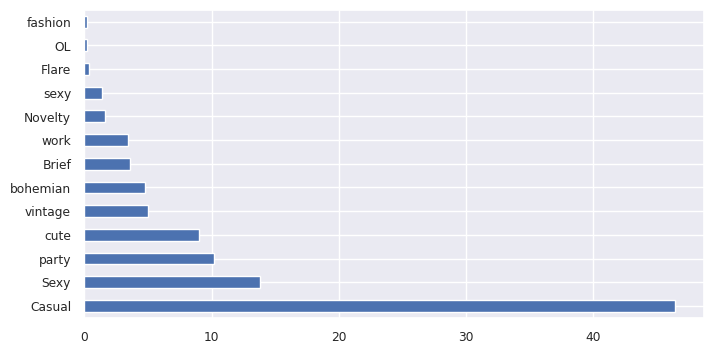

In [658]:
# Calculate the percentage of each categories in the "Style" variable.
(round(df.Style.value_counts(normalize=True)*100.0,1)).plot.barh()
plt.show()

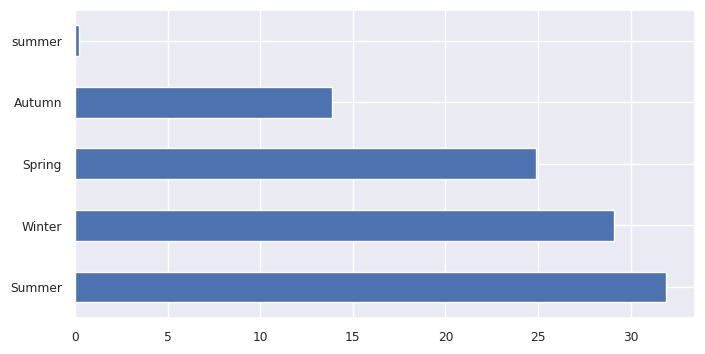

In [659]:
# Calculate the percentage of each categories in the "Season" variable.
(round(df.Season.value_counts(normalize=True)*100.0,1)).plot.barh()
plt.show()

In [660]:
df.groupby(by = 'Price')['Rating'].mean()

Price
Average      3.500794
High         1.600000
Low          3.572093
Medium       3.156667
high         3.440000
low          4.233333
very-high    3.123810
Name: Rating, dtype: float64

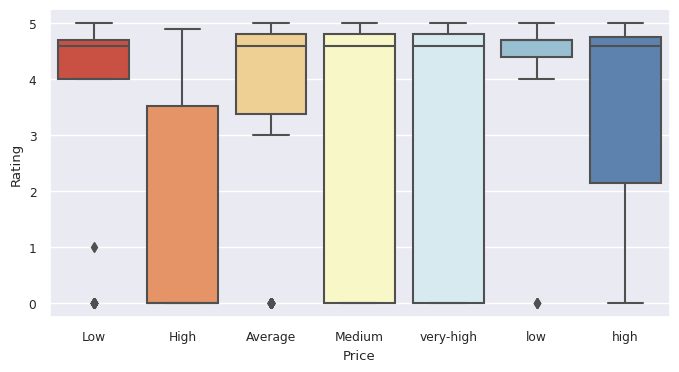

In [661]:
sns.boxplot(data = df, x = 'Price', y = 'Rating', palette= 'RdYlBu')
plt.show()

             Rating
Sentiment          
0          3.458966
1          3.624762


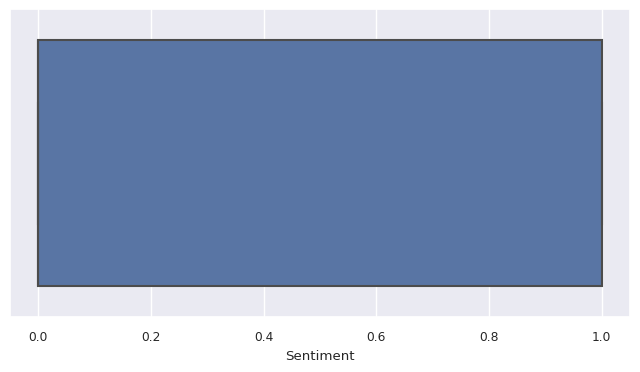

In [662]:
print(df.groupby('Sentiment').mean())
sns.boxplot(data=df, x="Sentiment")
plt.show()

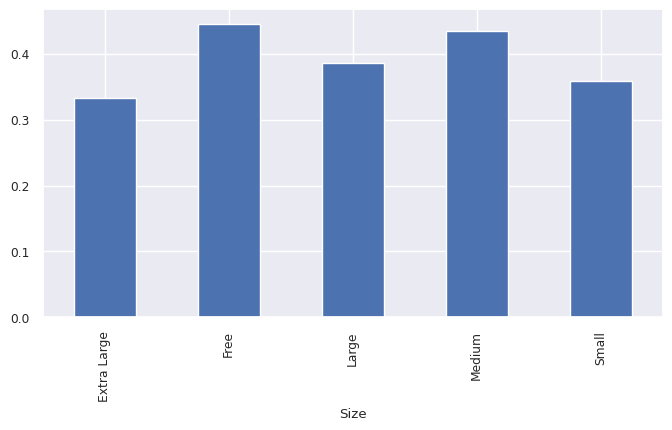

In [663]:
df.groupby(['Size'])['Sentiment'].mean().plot.bar()
plt.show()

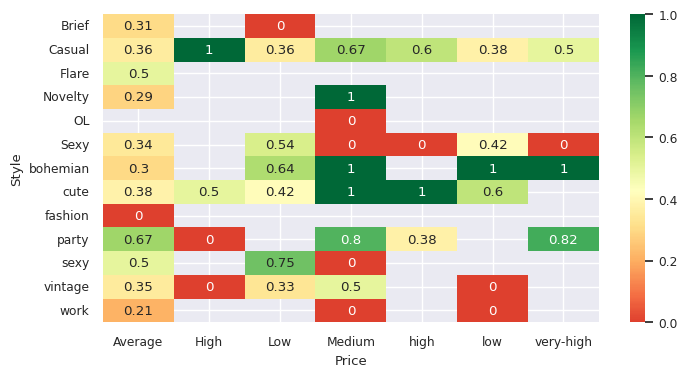

In [664]:
res = pd.pivot_table(data=df, index="Style", columns="Price", values="Sentiment")
sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)
plt.show()

In [665]:
# Find the median of Ratings for each Style category.
df['Rating'].groupby(df['Style']).median()

Style
Brief       4.60
Casual      4.60
Flare       0.00
Novelty     2.10
OL          0.00
Sexy        4.60
bohemian    4.65
cute        4.60
fashion     4.00
party       4.70
sexy        4.50
vintage     4.60
work        4.70
Name: Rating, dtype: float64

In [666]:
# Find the median of Ratings for each Style category.
df['Sentiment'].groupby(df['Season']).mean()

Season
Autumn    0.318841
Spring    0.604839
Summer    0.339623
Winter    0.400000
summer    0.000000
Name: Sentiment, dtype: float64

Input/Remove Missing Values

In [667]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         500 non-null    object 
 1   Price         498 non-null    object 
 2   Rating        500 non-null    float64
 3   Size          500 non-null    object 
 4   Season        498 non-null    object 
 5   NeckLine      497 non-null    object 
 6   SleeveLength  498 non-null    object 
 7   waiseline     413 non-null    object 
 8   Material      372 non-null    object 
 9   FabricType    234 non-null    object 
 10  Decoration    264 non-null    object 
 11  Pattern Type  391 non-null    object 
 12  Sentiment     500 non-null    int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB
None


In [668]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,Style,0
1,Price,2
2,Rating,0
3,Size,0
4,Season,2
5,NeckLine,3
6,SleeveLength,2
7,waiseline,87
8,Material,128
9,FabricType,266


In [669]:
df[df['Price'].isna()]

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Sentiment
262,party,NaN,4.8,Free,Winter,o-neck,sleevless,empire,NaN,NaN,embroidary,NaN,1
263,party,NaN,4.5,Large,Summer,NaN,full,NaN,NaN,NaN,NaN,NaN,1


In [670]:
#correcting the spellings.
df['Season'].unique()

array(['Summer', 'Autumn', 'Spring', 'Winter', nan, 'summer'],
      dtype=object)

In [671]:
#replacement of Season
df['Season'].replace(['Automn','winter'], ['Autumn','Winter'], inplace=True)
df['Season'].unique()

array(['Summer', 'Autumn', 'Spring', 'Winter', nan, 'summer'],
      dtype=object)

In [672]:
df['SleeveLength'].unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       'thressqatar', nan, 'sleveless'], dtype=object)

In [673]:
df['SleeveLength'].replace(['thressqatar'], ['threequarter'], inplace=True)
df['SleeveLength'].unique()

array(['sleevless', 'Petal', 'full', 'butterfly', 'short', 'threequarter',
       'halfsleeve', 'cap-sleeves', 'turndowncollor', 'threequater',
       'capsleeves', 'sleeveless', 'sleeevless', 'half', 'urndowncollor',
       nan, 'sleveless'], dtype=object)

In [674]:
df.isnull().sum().sum()

835

In [675]:
from sklearn.model_selection import train_test_split
X = df
y = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X,y)

       Style    Price  Rating    Size  Season   NeckLine SleeveLength  \
0       Sexy      Low     4.6  Medium  Summer     o-neck    sleevless   
1     Casual      Low     0.0   Large  Summer     o-neck        Petal   
2    vintage     High     0.0   Large  Autumn     o-neck         full   
3      Brief  Average     4.6   Large  Spring     o-neck         full   
4       cute      Low     4.5  Medium  Summer     o-neck    butterfly   
..       ...      ...     ...     ...     ...        ...          ...   
495   Casual      Low     4.7  Medium  Spring     o-neck         full   
496     Sexy      Low     4.3    Free  Summer     o-neck         full   
497   Casual  Average     4.7  Medium  Summer     v-neck         full   
498   Casual  Average     4.6   Large  Winter  boat-neck    sleevless   
499   Casual      Low     4.4    Free  Summer     v-neck        short   

    waiseline       Material  FabricType  Decoration Pattern Type  Sentiment  
0      empire            NaN     chiffon    

In [676]:
print(df['Sentiment'])

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    0
497    1
498    1
499    0
Name: Sentiment, Length: 500, dtype: int64


In [677]:

#Sentiment
df['Sentiment'] = np.where(df['Sentiment'] > 5, 1, 0)
df.head()
     


,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Sentiment
0,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,0
1,Casual,Low,0.0,Large,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,vintage,High,0.0,Large,Autumn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,Brief,Average,4.6,Large,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,0
4,cute,Low,4.5,Medium,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [678]:
df['Sentiment'].value_counts()

0    500
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

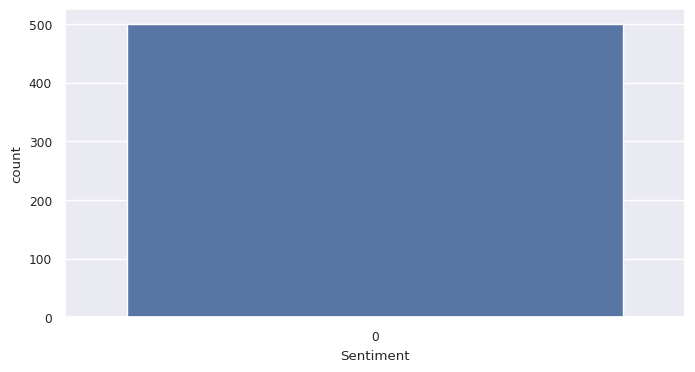

In [679]:
sns.set(font_scale = 0.8, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [8, 4]
sns.countplot(x=df["Sentiment"])
     

In [680]:
df['Sentiment'].describe()

count    500.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Sentiment, dtype: float64

TRAIN TEST SPLIT


In [681]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Rating'], df['Sentiment'], test_size=0.2, random_state=0)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)


The Train set size  (400,)
The Test set size  (100,)


In [682]:
print(X_train)


107    4.6
336    4.7
71     0.0
474    4.6
6      0.0
      ... 
323    5.0
192    4.8
117    4.7
47     0.0
172    4.6
Name: Rating, Length: 400, dtype: float64


In [683]:
print(y_train)

107    0
336    0
71     0
474    0
6      0
      ..
323    0
192    0
117    0
47     0
172    0
Name: Sentiment, Length: 400, dtype: int64


In [684]:
X_train.shape

(400,)

In [685]:
y_train.shape

(400,)

Logistic Regression

In [686]:
from sklearn.linear_model import LogisticRegression

In [687]:
lr = LogisticRegression()


In [688]:
X_train= x_train.reshape(-1, 1)
#X_test = x_test.reshape(-1, 1)

In [ ]:

lr.fit(X_train, y_train)

In [692]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))